## A comparison of Python's plotnine library against R's ggplot2 package

### Importing the necessary libraries

In [1]:
import pandas as pd

In [2]:
from plotnine import *
from plotnine.data import *

#### We'll be using the following datasets for comparison:
1. "mtcars" dataset (available in both R's base package and plotnine)
2. "singer" dataset available only in R's "lattice" package (saved as a csv from within R)
3. "Salaries" dataset available only in R's "carData" package (saved as a csv from within R)

Now let's use %load_ext magic command to load the rpy2 IPython extension into the notebook.

In [4]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Let's get a glimpse into the top part of the "mtcars" dataset.

In [5]:
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Plot 1: Scatterplot of "wt" vs "mpg"

#### R's ggplot2:

We can now use the %%R magic command at the top of any code cell in which we want to write our R code:

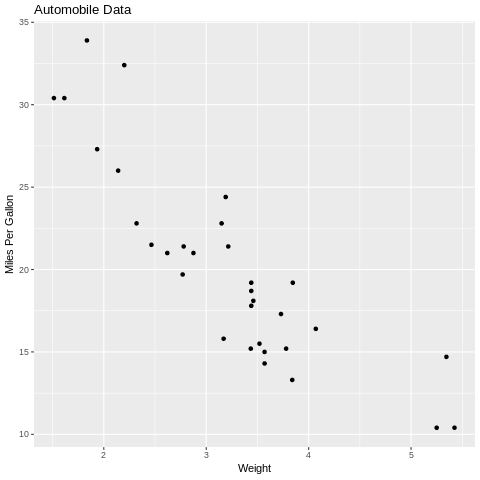

In [6]:
%%R
library(ggplot2)
ggplot(data=mtcars, aes(x=wt, y=mpg)) + geom_point() +  
labs(title='Automobile Data', x='Weight', y='Miles Per Gallon')

#### Python's plotnine:

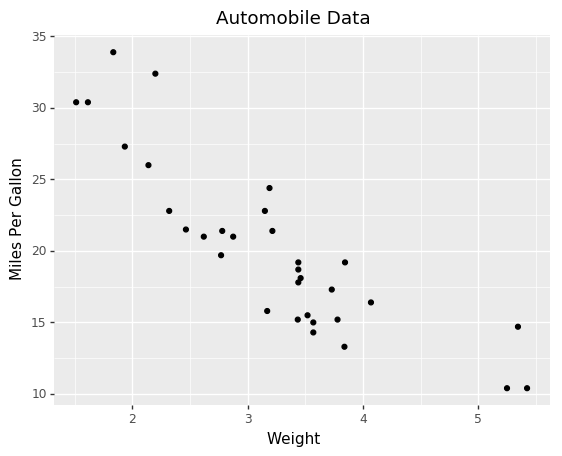

<ggplot: (-9223363298274988270)>

In [7]:
ggplot(mtcars, aes(x='wt', y='mpg')) + geom_point() + \
labs(title='Automobile Data', x='Weight', y='Miles Per Gallon')

# Line 1: 
    # ggplot() - Replace data=mtcars in R with mtcars in Python, i.e. here data is only a positional and not keyword argument
    # aes() - Replace x=wt in R with x='wt' in Python, i.e. add quotes around variable names

__Conclusion:__ Very similar plots except for the plot and point size.

### Plot 2: Scatterplot of 'wt' vs 'mpg' differentiating 'disp' by size, to produce a Bubble Chart.

#### R's ggplot2:

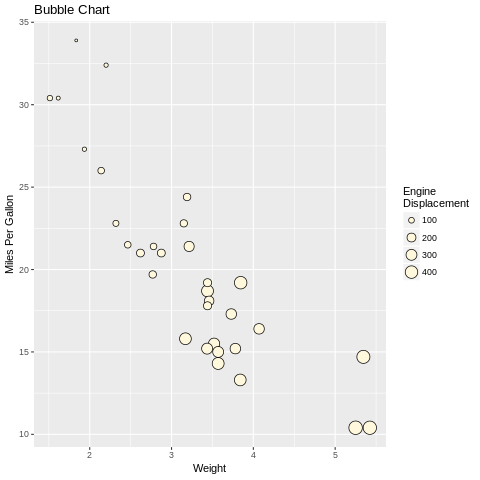

In [8]:
%%R
ggplot(mtcars, aes(x=wt, y=mpg, size=disp)) + geom_point(shape=21, color='black', fill='cornsilk') +
labs(x='Weight', y='Miles Per Gallon', title='Bubble Chart', size='Engine\nDisplacement')

#### Python's plotnine:

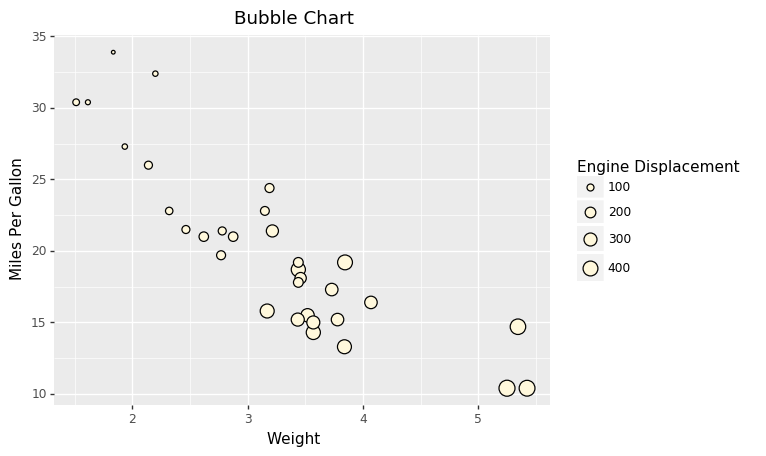

<ggplot: (8738579770446)>

In [9]:
ggplot(mtcars, aes(x='wt', y='mpg', size='disp')) + geom_point(shape='o', color='black', fill='cornsilk') + \
labs(x='Weight', y='Miles Per Gallon', title='Bubble Chart', size='Engine Displacement')

# Line 2: geom_point() - Replace shape=21 with shape='o'. Other shape options are as follows: 
# d: diamond, h: hexagon, p: pentagon, s: square, v: inverted triangle, x: cross, 
# 1: Y, 2: inverted Y, 3: right Y, 4: left Y, 8: Octagon

# Last Line: Had to replace size='Engine\nDisplacement' with size='Engine Displacement' to avoid overlap on legend

__Conclusion:__ Very similar plots except for the plot size and bubble outlines.

### Plot 3: Scatterplot of "wt" vs "mpg", with a superimposed line of best fit and 95% confidence region

#### R's ggplot:

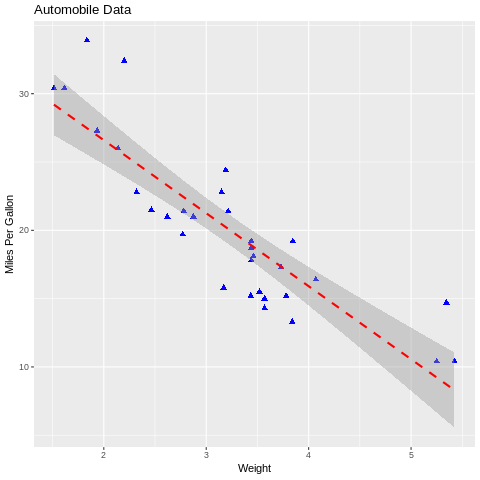

In [10]:
%%R
ggplot(data=mtcars, aes(x=wt, y=mpg)) +
geom_point(pch=17, color='blue', size=2) +
geom_smooth(method='lm', color='red', linetype=2) +
labs(title='Automobile Data', x='Weight', y='Miles Per Gallon')

#### Plotnine's ggplot:

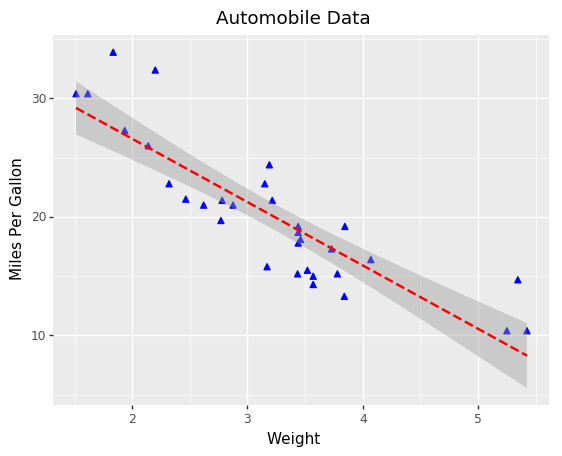

<ggplot: (-9223363298275002985)>

In [11]:
ggplot(mtcars, aes(x='wt', y='mpg')) + \
geom_point(shape='^', color='blue', size=2) + \
geom_smooth(method='lm', color='red', linetype='dashed') + \
labs(title='Automobile Data', x='Weight', y='Miles Per Gallon')

# Line 2: geom_point() - Replace shape=17 with shape='^'. Other shape options are as follows: 
# d: diamond, h: hexagon, p: pentagon, s: square, v: inverted triangle, x: cross, 
# 1: Y, 2: inverted Y, 3: right Y, 4: left Y, 8: Octagon, ^:Triangle, *: Star, +:Add

# Line 3: geom_smooth() - Replace linetype=2 in R with linetype='dashed' in Python

__Conclusion:__ Very similar plots except for the plot and point size.

### Plot 4: Scatterplot of "hp" vs "wt" differentiating "mpg" by color, for each value of "cyl"

#### R's ggplot2:

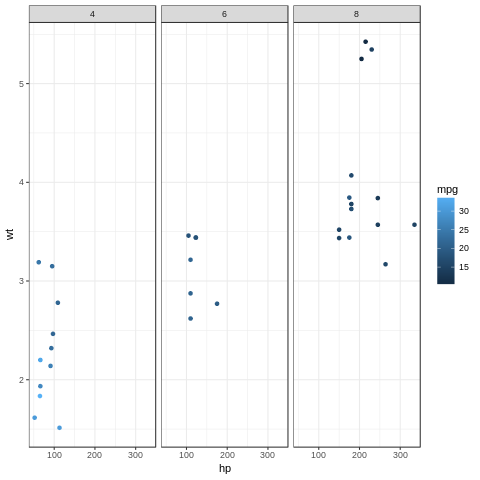

In [12]:
%%R
ggplot(data=mtcars, aes(x=hp, y=wt, color=mpg)) + geom_point() + 
facet_wrap(~cyl) + theme_bw()

#### Python's plotnine:

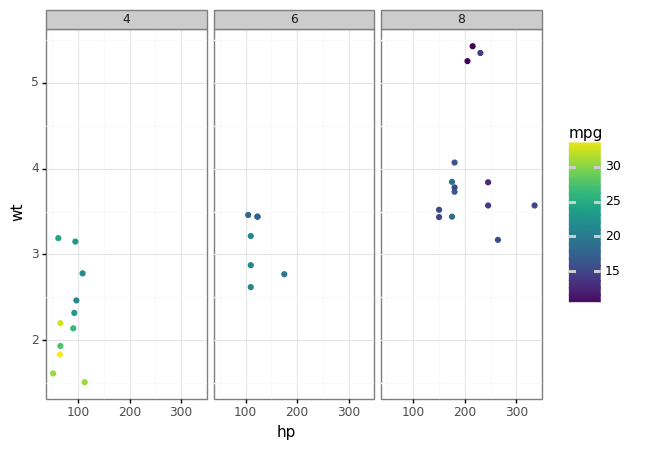

<ggplot: (-9223363298323730239)>

In [13]:
ggplot(mtcars, aes(x='hp', y='wt', color='mpg')) + geom_point() + \
facet_wrap('~cyl') + theme_bw() 

# Line 2: facet_wrap() - Replace ~cyl in R with '~cyl' in Python, i.e. add quotes around variable names

__Conclusion:__ Very similar plots except for the plot size as well as point size / color. In fact plotnine's colormap is better than ggplot2 as it makes it easier to distinguish the three categories of hp.

### Plot 5: Scatterplot of "hp" vs "mps" differentiating "cyl" by both shape and color, faceted by values of "am" and "vs"

#### R's ggplot2:

In [14]:
%%R
mtcars$am <- factor(mtcars$am, levels=c(0,1), labels=c('Automatic', 'Manual'))
mtcars$vs <- factor(mtcars$vs, levels=c(0,1), labels=c('V-Engine', 'Straight Engine'))
mtcars$cyl <- factor(mtcars$cyl)

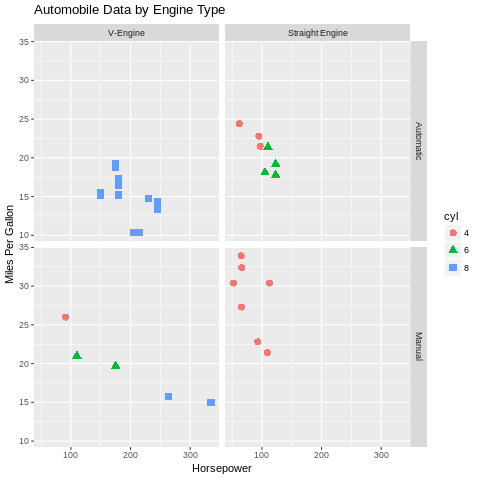

In [15]:
%%R
ggplot(data=mtcars, aes(x=hp, y=mpg, shape=cyl, color=cyl)) +
geom_point(size=3) +
facet_grid(am~vs) +
labs(title='Automobile Data by Engine Type',
x='Horsepower', y='Miles Per Gallon')

We'll need to convert the columns "am", "vs", and "cyl" in plotnine's mtcars data to categorical type as well. Let's check the data types of these columns before conversion:

In [16]:
mtcars['am'].dtype, mtcars['vs'].dtype, mtcars['cyl'].dtype

(dtype('int64'), dtype('int64'), dtype('int64'))

The equivalent of R code in the above cell would be as follows in Python:

In [17]:
mtcars['am'] = mtcars['am'].astype('category')
# change the type of data in mtcars['am'] to CategoricalDtype
mtcars['am'] = mtcars['am'].cat.rename_categories(['Automatic', 'Manual'])
# replace categorical levels 0 and 1 with labels 'Automatic' and 'Manual'

mtcars['vs'] = mtcars['vs'].astype('category')
# change the type of data in mtcars['vs'] to CategoricalDtype
mtcars['vs'] = mtcars['vs'].cat.rename_categories(['V-Engine', 'Straight Engine'])
# replace categorical levels 0 and 1 with labels 'V-Engine' and 'Straight Engine'

mtcars['cyl'] = mtcars['cyl'].astype('category')
# change the type of data in mtcars['cyl'] to CategoricalDtype

Now let's check the data types again to verify the conversion:

In [18]:
mtcars['am'].dtype, mtcars['vs'].dtype, mtcars['cyl'].dtype

(CategoricalDtype(categories=['Automatic', 'Manual'], ordered=False),
 CategoricalDtype(categories=['V-Engine', 'Straight Engine'], ordered=False),
 CategoricalDtype(categories=[4, 6, 8], ordered=False))

#### Python's plotnine:

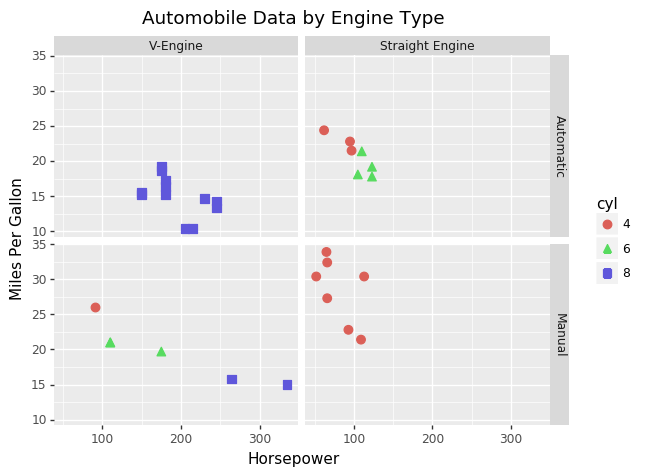

<ggplot: (8738531038668)>

In [19]:
ggplot(mtcars, aes(x='hp', y='mpg', shape='cyl', color='cyl')) + \
geom_point(size=3) + \
facet_grid('am~vs') + \
labs(title='Automobile Data by Engine Type', x='Horsepower', y='Miles Per Gallon')
# Line 4: facet_grid() - Replace am~vs in R with 'am~vs' in Python, i.e. add quotes around faceting variables

__Conclusion:__ Very similar plots except for the plot size as well as point size / color.

Now let's read the file "singer.csv" into a dataframe for the plots to follow.

In [20]:
singer = pd.read_csv("data/singer.csv")

In [21]:
singer.head()

,height,voice.part
0,64,Soprano 1
1,62,Soprano 1
2,66,Soprano 1
3,65,Soprano 1
4,60,Soprano 1


### Plot 6: Box plot of singer "heights" by "voice.part"

#### R's ggplot2:

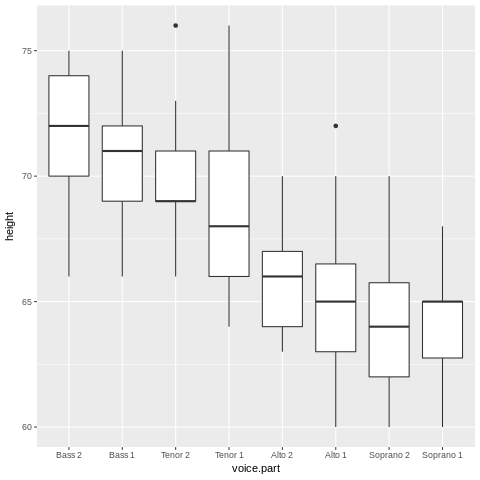

In [22]:
%%R
library(lattice)
ggplot(singer, aes(x=voice.part, y=height)) + geom_boxplot()

#### Python's plotnine:

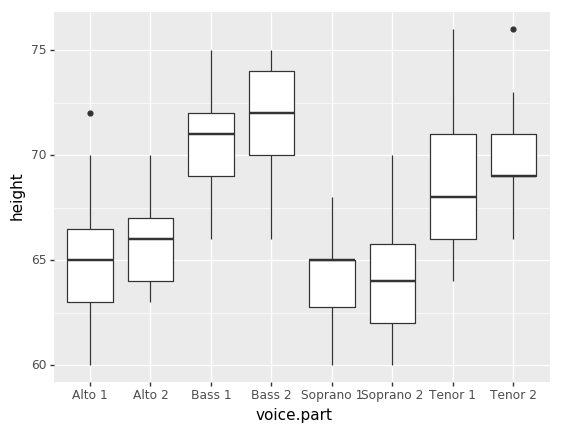

<ggplot: (8738519772431)>

In [23]:
ggplot(singer, aes(x='voice.part', y='height')) + geom_boxplot()

__Conclusion:__ Pretty similar plots except for the plot and boxplot size. Furthermore, it looks like R's ggplot2 created a plot that is more or less sorted by the median values of boxplots in descending order. While plotnine's plot sorted the boxplots in alphabetical order.

### Plot 7: Combined violin and box plot graph of singers "height" by "voice.part"

#### R's ggplot2:

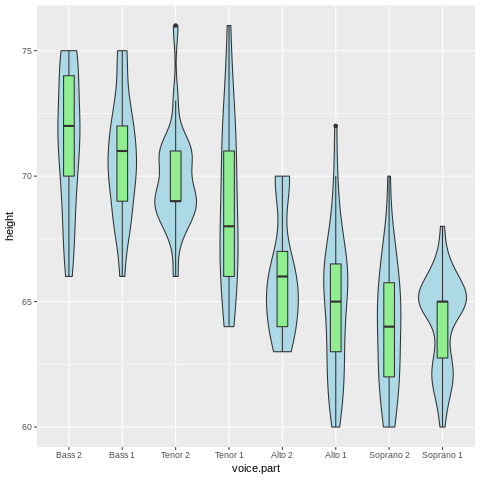

In [24]:
%%R
ggplot(singer, aes(x=voice.part, y=height)) +
geom_violin(fill='lightblue') +
geom_boxplot(fill='lightgreen', width=.2)

#### Python's plotnine:

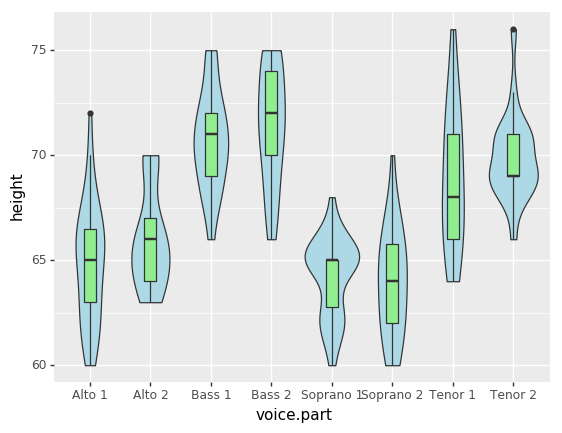

<ggplot: (-9223363298335155964)>

In [25]:
ggplot(singer, aes(x='voice.part', y='height')) + \
geom_violin(fill='lightblue') + \
geom_boxplot(fill='lightgreen', width=.2)

__Conclusion:__ Very similar plots except for the plot size. The boxplots created by R's ggplot2 and plotnine are once again in the same order as in cells 21 and 22.

### Plot 8: Histogram of singer heights

#### R's ggplot2:

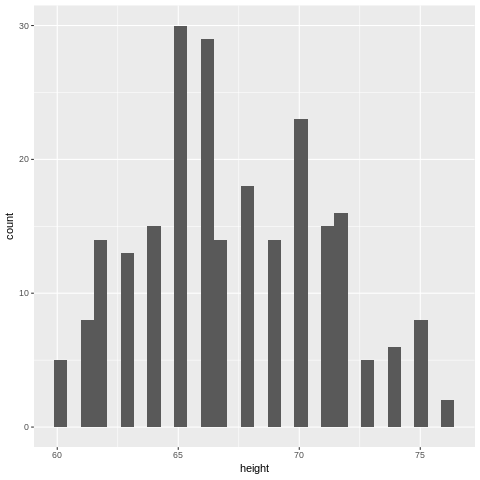

In [26]:
%%R
ggplot(singer, aes(x=height)) + geom_histogram(bins=30)

#### Python's plotnine:

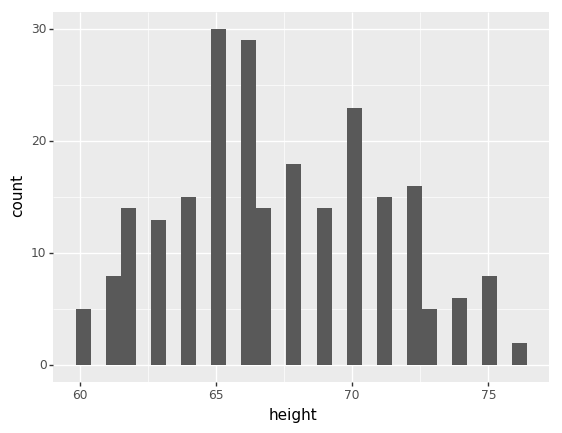

<ggplot: (8738519551033)>

In [27]:
ggplot(singer, aes(x='height')) + geom_histogram(bins=30)

__Conclusion:__ Very similar plots except for the plot size. 

### Plot 9: Histogram of singers 'height' faceted by values of "voice.part" column

#### R's ggplot2:

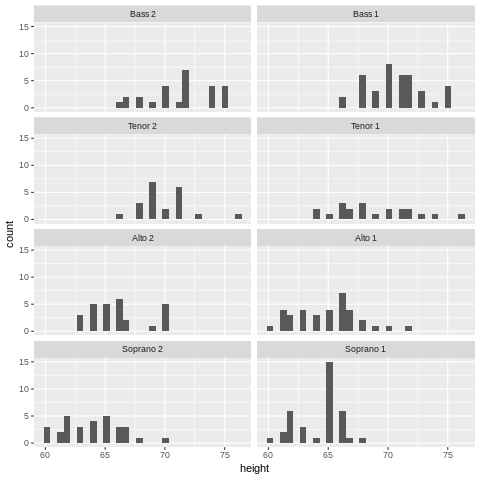

In [28]:
%%R
ggplot(data=singer, aes(x=height)) +
geom_histogram(bins=30) +
facet_wrap(~voice.part, nrow=4)

Now we'll need to rename the column 'voice.part' to 'voice' because plotnine's facet_wrap() can't handle a dot in a column's name.

In [29]:
singer.columns = ['height', 'voice'] 

#### Python's plotnine:

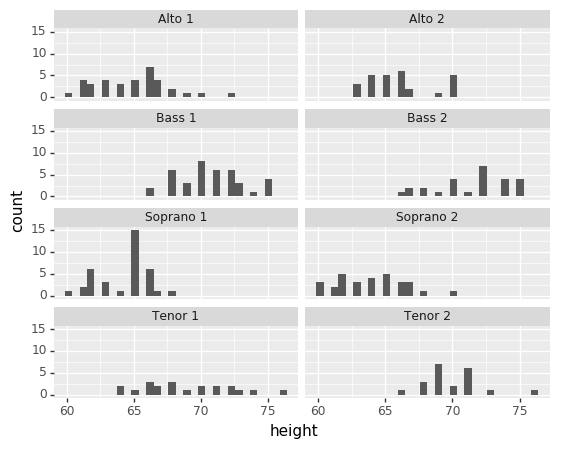

<ggplot: (8738519514667)>

In [30]:
ggplot(singer, aes(x='height')) + \
geom_histogram(bins=30) + \
facet_wrap('~voice', nrow=4)
# Line 2: geom_histogram() - Add bins=30 in Python to avoid warning display
# Line 3: facet_wrap() - Replace ".~voice" in R with "~voice" in Python

__Conclusion:__ Very similar plots except for plot size and the ordering of faceted column (voice) values like Plots 6 and 7. 

### Plot 9: Density plots for singers 'height' faceted by values of 'voice.part' in a different fill color

#### R's ggplot2:

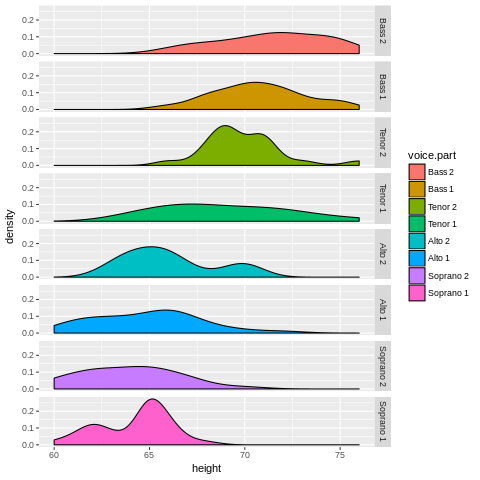

In [31]:
%%R
ggplot(data=singer, aes(x=height, fill=voice.part)) +
geom_density() +
facet_grid(voice.part~.)

#### Python's plotnine:

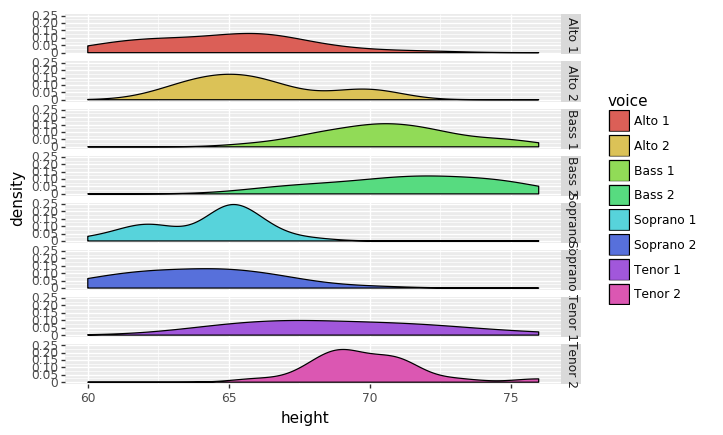

<ggplot: (8738519481818)>

In [32]:
ggplot(singer, aes(x='height', fill='voice')) + \
geom_density() + \
facet_grid('voice~.')

__Conclusion:__ Very similar plots except for plot size and the ordering of faceted column (voice) values like Plots 6, 7, and 8. However in plotnine, the voice value labels on the right are overlapping as are the y-axis tick-labels on the left.

Now let's read the file "Salaries.csv" into a dataframe for the plots to follow.

In [33]:
Salaries = pd.read_csv("data/Salaries.csv")

In [34]:
Salaries.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


### Plot 10: Notched box plots of 'rank' vs 'salary' with superimposed points and a rug plot on the vertical axis.

#### R's ggplot2:

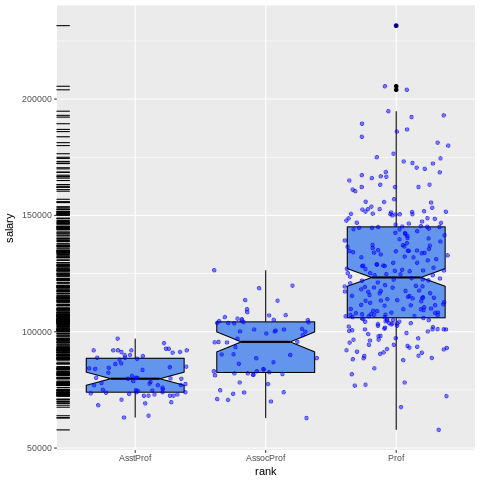

In [35]:
%%R
library(carData)
ggplot(Salaries, aes(x=rank, y=salary)) +
geom_boxplot(fill='cornflowerblue',
color='black', notch=TRUE)+
geom_point(position='jitter', color='blue', alpha=.5)+
geom_rug(sides='l', color='black')

#### Python's plotnine:

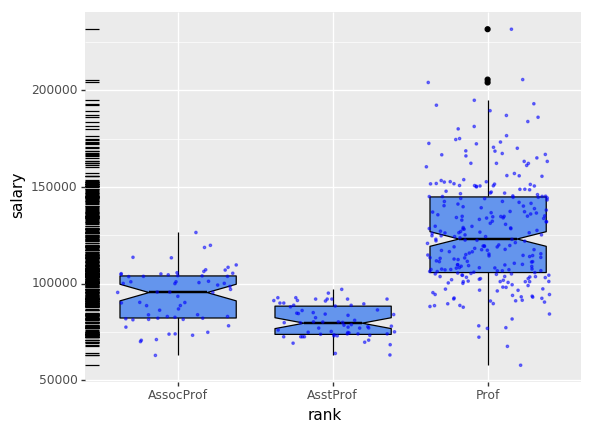

<ggplot: (8738519075546)>

In [36]:
ggplot(Salaries, aes(x='rank', y='salary')) + \
geom_boxplot(fill='cornflowerblue', \
color='black', notch=True) + \
geom_point(position='jitter', size=0.5, color='blue', alpha=.5) + \
geom_rug(sides='l', color='black')

__Conclusion:__ Very similar plots except for plot and point size and the ordering of academic ranks.

### Plot 11: Density plots of university salaries, grouped by academic rank

#### R's ggplot2:

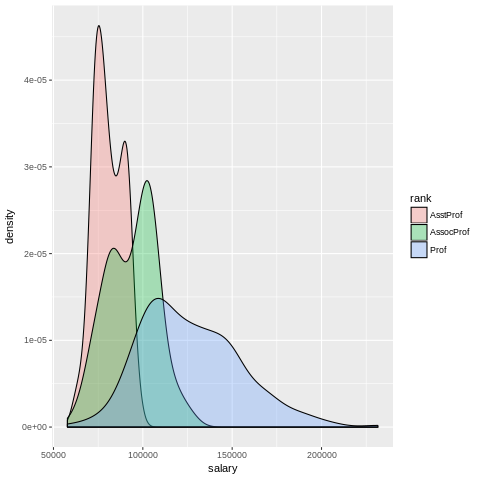

In [37]:
%%R
ggplot(data=Salaries, aes(x=salary, fill=rank)) + geom_density(alpha=.3)

#### Python's plotnine:

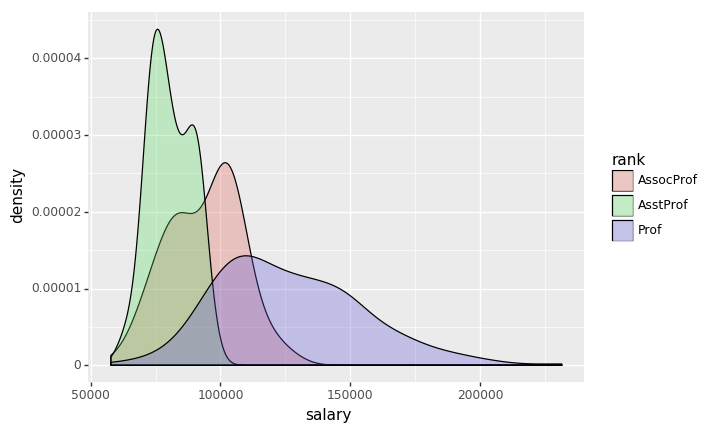

<ggplot: (8738517991351)>

In [38]:
ggplot(Salaries, aes(x='salary', fill='rank')) + \
geom_density(alpha=.3)

__Conclusion:__ Very similar plots except for plot size and the switching of colors between AsstProf and AssocProf due to the difference in their ordering as in previous plots.

### Plot 12: Scatterplot of years since graduation and salary. Academic rank is represented by color, and sex is represented by shape

#### R's ggplot2:

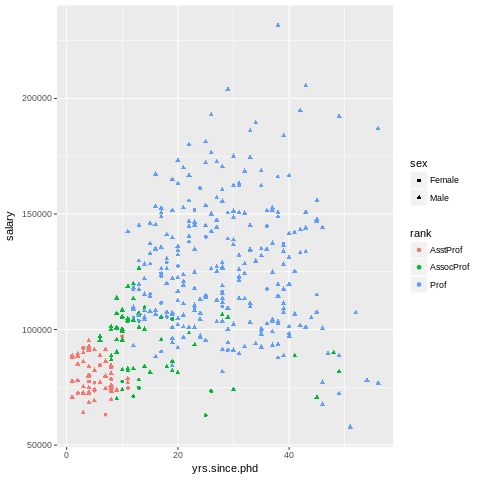

In [39]:
%%R
ggplot(Salaries, aes(x=yrs.since.phd, y=salary, color=rank, shape=sex)) + geom_point()

#### Python's plotnine:

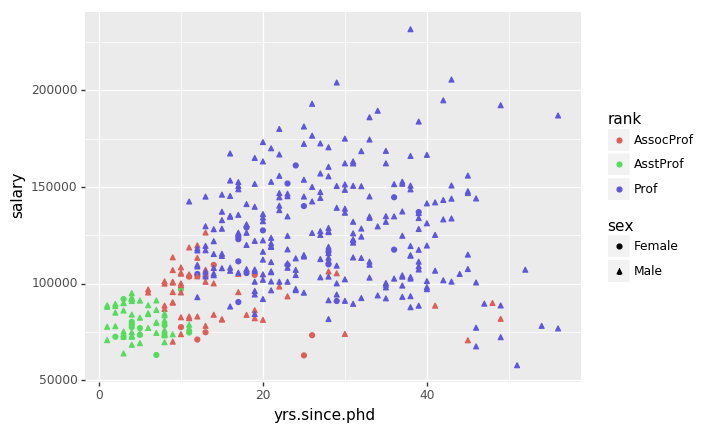

<ggplot: (8738517958499)>

In [40]:
ggplot(Salaries, aes(x='yrs.since.phd', y='salary', color='rank', shape='sex')) + geom_point()

__Conclusion:__ Very similar plots except for plot size and the switching of colors between AsstProf and AssocProf due to the difference in their ordering as in previous plots.

### Plots 13: Three versions of a Grouped Bar Chart. Each displays the number of professors by academic rank and sex.

### 13 - A: Grouped bar charts in stacked position.

#### R's ggplot2:

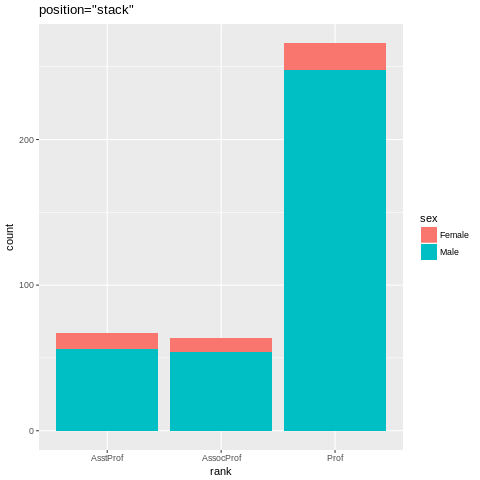

In [41]:
%%R
ggplot(Salaries, aes(x=rank, fill=sex)) +
geom_bar(position='stack') + labs(title='position="stack"')

#### Python's plotnine:

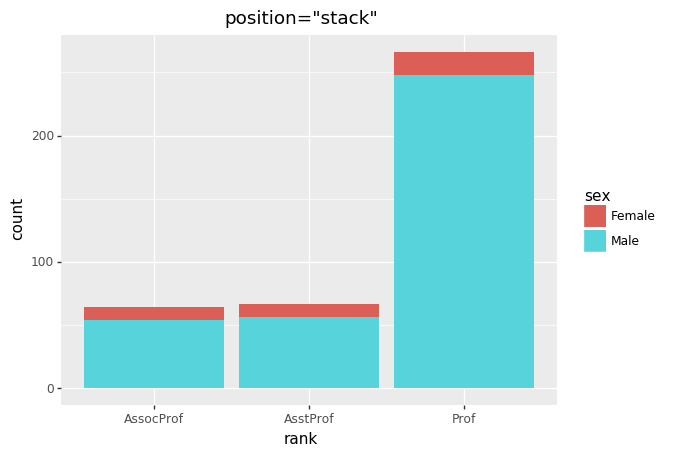

<ggplot: (-9223363298336859760)>

In [42]:
ggplot(Salaries, aes(x='rank', fill='sex')) + \
geom_bar(position='stack') + labs(title='position="stack"')

__Conclusion:__ Very similar plots except for plot size and the ordering of academic ranks as in previous plots.

### 13 - B: Grouped bar charts in dodged position.

#### R's ggplot2:

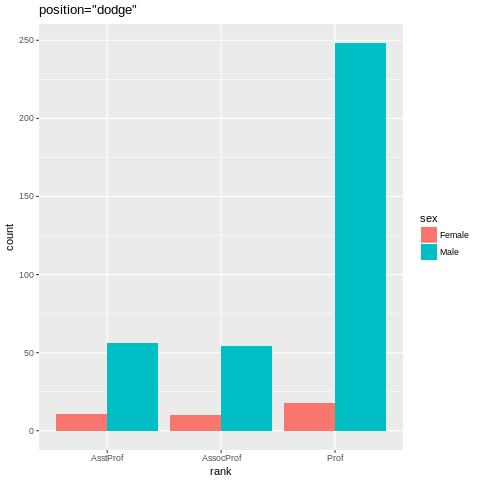

In [43]:
%%R
ggplot(Salaries, aes(x=rank, fill=sex)) +
geom_bar(position='dodge') + labs(title='position="dodge"')

#### Python's plotnine:

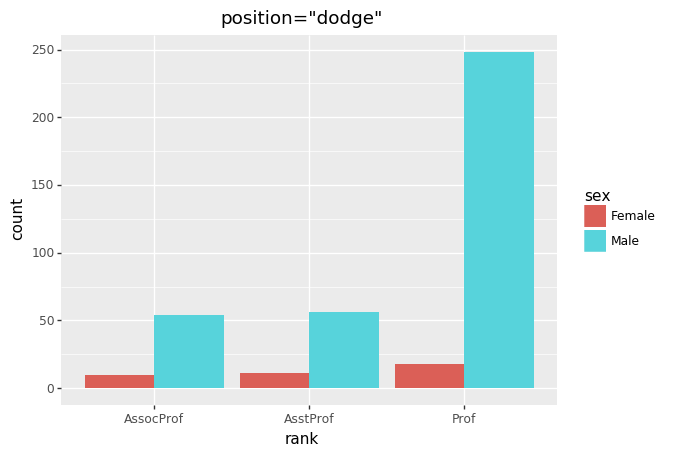

<ggplot: (-9223363298336877347)>

In [44]:
ggplot(Salaries, aes(x='rank', fill='sex')) + \
geom_bar(position='dodge') + labs(title='position="dodge"')

__Conclusion:__ Very similar plots except for plot size and the ordering of academic ranks as in previous plots.

### 13 - C: Grouped bar charts in filled position.

#### R's ggplot2:

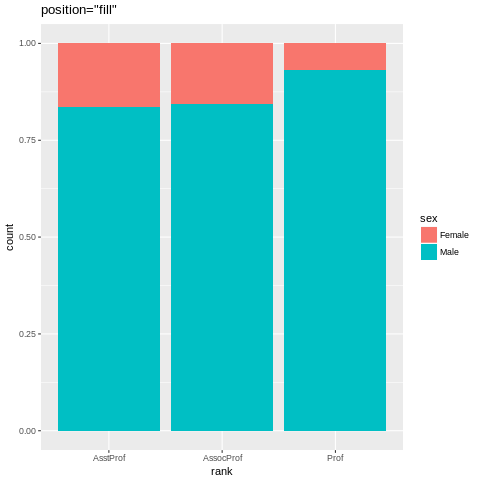

In [45]:
%%R
ggplot(Salaries, aes(x=rank, fill=sex)) +
geom_bar(position='fill') + labs(title='position="fill"')

#### Python's plotnine:

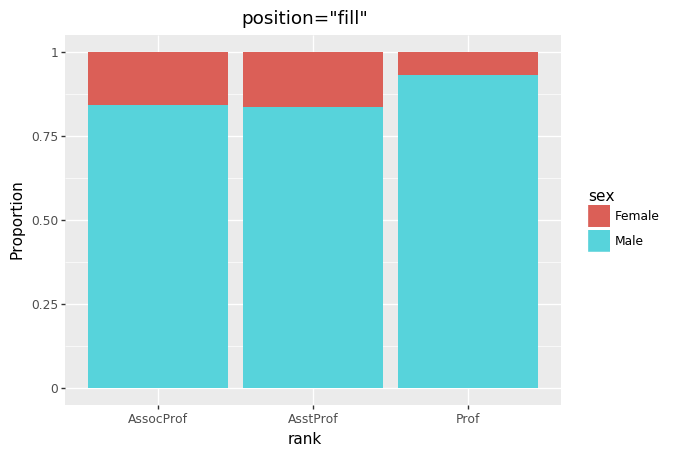

<ggplot: (8738519071552)>

In [46]:
ggplot(Salaries, aes(x='rank', fill='sex')) + \
geom_bar(position='fill') + labs(title='position="fill"', y='Proportion')

__Conclusion:__ Very similar plots except for plot size and the ordering of academic ranks as in previous plots.

### Plot 14: Scatterplot of years since graduation and salary. Academic rank is represented by color and shape, and sex is faceted

#### R's ggplot2:

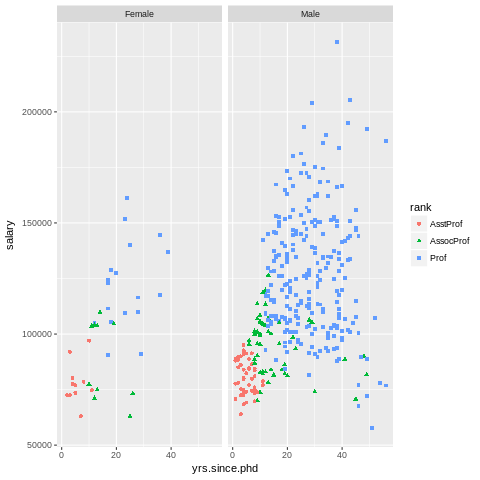

In [47]:
%%R
ggplot(Salaries, aes(x=yrs.since.phd, y=salary, color=rank, shape=rank)) + geom_point() + facet_grid(.~sex)

#### Python's plotnine:

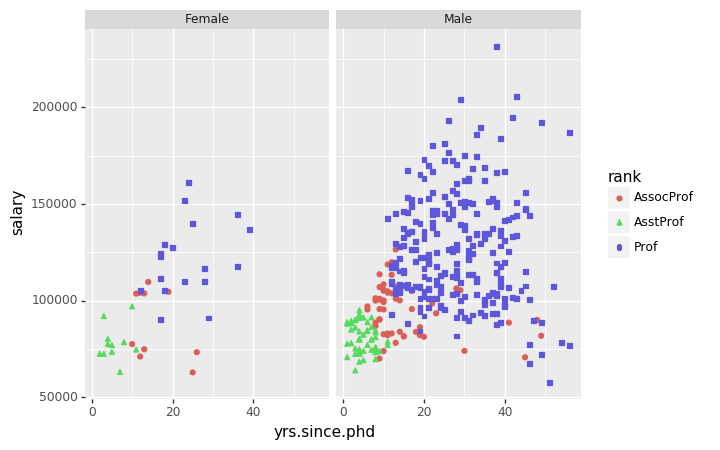

<ggplot: (8738513061801)>

In [48]:
ggplot(Salaries, aes(x='yrs.since.phd', y='salary', color='rank', shape='rank')) + geom_point() + facet_grid('.~sex')
# For facet_grid(), the dot is needed in Python just like R

__Conclusion:__ Very similar plots except for plot size and point size/color and the ordering of academic ranks as in previous plots.

### Plot 15: Scatterplot of years since doctorate and current faculty salary. A fitted loess smoothed line with 95% confidence limits has been added.

#### R's ggplot2:

/mnt/86A4DC21A4DC1591/Data Science/Projects/Envs/plotnine/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: `geom_smooth()` using method = 'loess'

  warnings.warn(x, RRuntimeWarning)


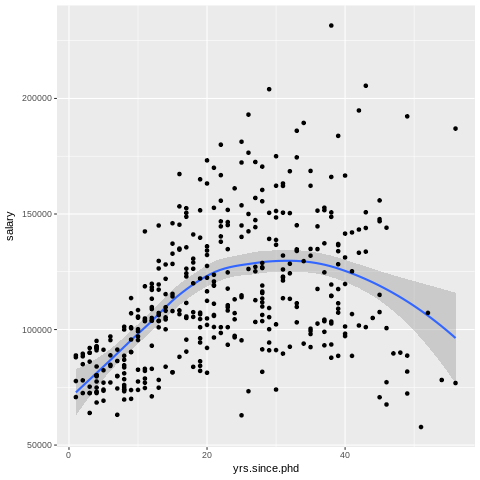

In [49]:
%%R
data(Salaries, package='carData')
ggplot(data=Salaries, aes(x=yrs.since.phd, y=salary)) + geom_smooth() + geom_point()

#### Python's plotnine:

/mnt/86A4DC21A4DC1591/Data Science/Projects/Envs/plotnine/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


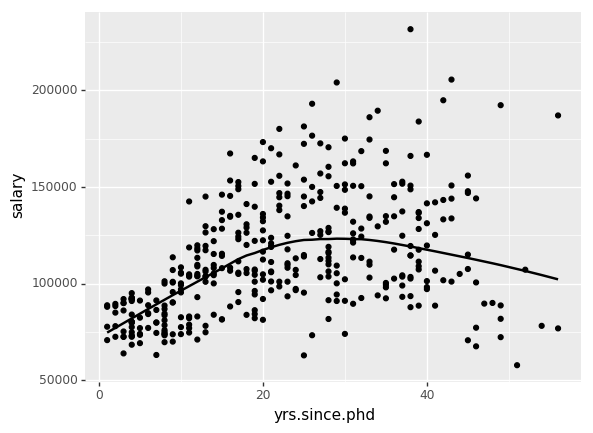

<ggplot: (8738513051165)>

In [50]:
ggplot(Salaries, aes(x='yrs.since.phd', y='salary')) + geom_smooth() + geom_point()

__Conclusion:__ Very similar plots except for plot and point size. Confidence intervals have not yet been implemented in plotnine.

### Plot 16: Box plots of faculty salaries grouped by academic rank and sex. The axis text has been customized.

#### R's ggplot2:

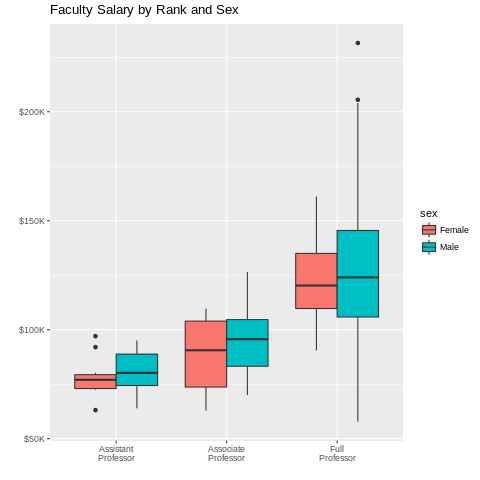

In [51]:
%%R
data(Salaries,package='carData')
library(ggplot2)
ggplot(data=Salaries, aes(x=rank, y=salary, fill=sex)) +
geom_boxplot() +
scale_x_discrete(breaks=c('AsstProf', 'AssocProf', 'Prof'),
labels=c('Assistant\nProfessor',
'Associate\nProfessor',
'Full\nProfessor')) +
scale_y_continuous(breaks=c(50000, 100000, 150000, 200000),
labels=c('$50K', '$100K', '$150K', '$200K')) +
labs(title='Faculty Salary by Rank and Sex', x='', y='')

#### Python's plotnine:

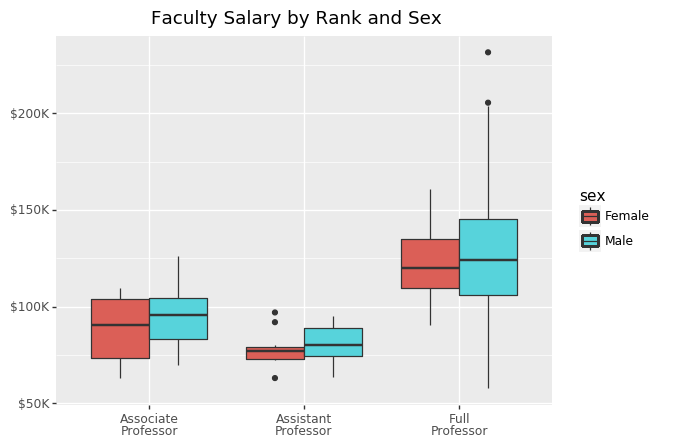

<ggplot: (-9223363298336923255)>

In [52]:
ggplot(Salaries, aes(x='rank', y='salary', fill='sex')) + \
geom_boxplot() + \
scale_x_discrete(breaks=['AsstProf', 'AssocProf', 'Prof'],\
labels=['Assistant\nProfessor', 'Associate\nProfessor', 'Full\nProfessor']) + \
scale_y_continuous(breaks=[50000, 100000, 150000, 200000],\
labels=['$50K', '$100K', '$150K', '$200K']) + \
labs(title='Faculty Salary by Rank and Sex', x='', y='')

# Line 3: scale_x_discrete() - Replace c( with [ and ) with ] to make a Python list
# Line 5: scale_y_continuous() - Replace c( with [ and ) with ] to make a Python list

__Conclusion:__ Very similar plots except for plot size and the ordering of academic ranks as in previous plots.

### Plot 17: Box plots of faculty salaries grouped by academic rank. The axis text has been customized, along with the legend title and position.

#### R's ggplot2:

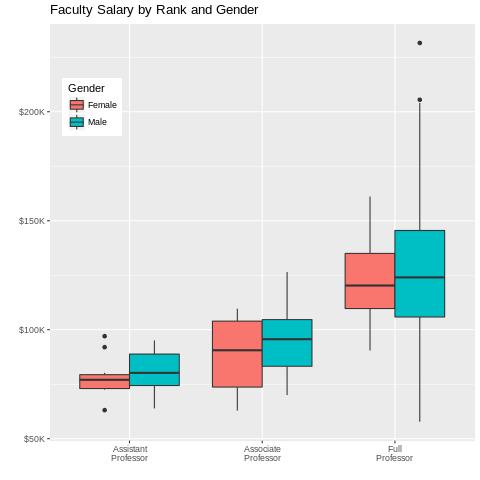

In [53]:
%%R
data(Salaries,package='carData')
library(ggplot2)
ggplot(data=Salaries, aes(x=rank, y=salary, fill=sex)) +
geom_boxplot() +
scale_x_discrete(breaks=c('AsstProf', 'AssocProf', 'Prof'),
labels=c('Assistant\nProfessor', 'Associate\nProfessor', 'Full\nProfessor')) +
scale_y_continuous(breaks=c(50000, 100000, 150000, 200000),
labels=c('$50K', '$100K', '$150K', '$200K')) +
labs(title='Faculty Salary by Rank and Gender', x='', y='', fill='Gender') +
theme(legend.position=c(.1,.8))

#### Python's plotnine:

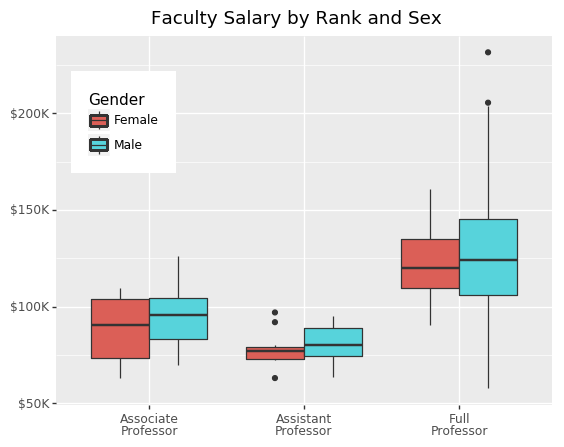

<ggplot: (-9223363298335704211)>

In [54]:
ggplot(Salaries, aes(x='rank', y='salary', fill='sex')) + \
geom_boxplot() + \
scale_x_discrete(breaks=['AsstProf', 'AssocProf', 'Prof'],\
labels=['Assistant\nProfessor', 'Associate\nProfessor', 'Full\nProfessor']) + \
scale_y_continuous(breaks=[50000, 100000, 150000, 200000],\
labels=['$50K', '$100K', '$150K', '$200K']) + \
labs(title='Faculty Salary by Rank and Sex', x='', y='', fill='Gender') + \
theme(legend_position=(.23,.7))

# Last Line: theme() - Replace legend.position in R with legend_position in Python
# Also had to change the tuple value from legend_position=(.1,.8) to legend_position=(.23,.7) to get the same position as R

__Conclusion:__ Very similar plots except for plot size and the ordering of academic ranks as in previous plots.

### Plot 18: Scatterplot of salary vs. experience for assistant, associate, and full professors. Point colors have been specified manually.

#### R's ggplot2:

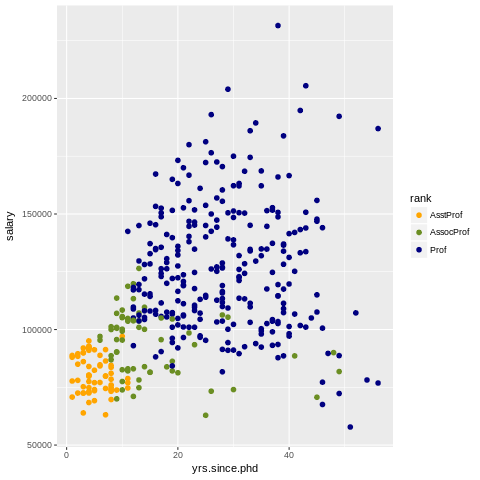

In [55]:
%%R
data(Salaries, package='carData')
ggplot(data=Salaries, aes(x=yrs.since.phd, y=salary, color=rank)) +
scale_color_manual(values=c('orange', 'olivedrab', 'navy')) +
geom_point(size=2)

#### Python's plotnine:

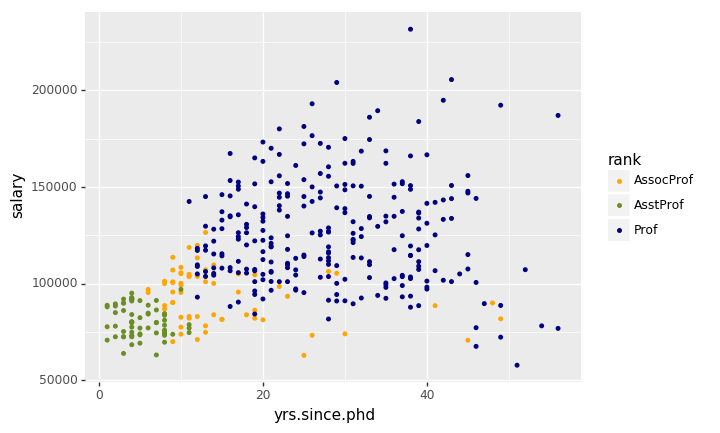

<ggplot: (-9223363298335258375)>

In [56]:
ggplot(Salaries, aes(x='yrs.since.phd', y='salary', color='rank')) + \
scale_color_manual(values=['orange', 'olivedrab', 'navy']) + \
geom_point(size=1)

# Last Line: Had to replace geom_point(size=2) with geom_point(size=1) for equivalent size in R

__Conclusion:__ Very similar plots except for plot size and the ordering of academic ranks as in previous plots. Had to set different size in geom_point() to get more or less the same point size for both plots.

### Plot 19: Box plots with a customized theme

#### R's ggplot2:

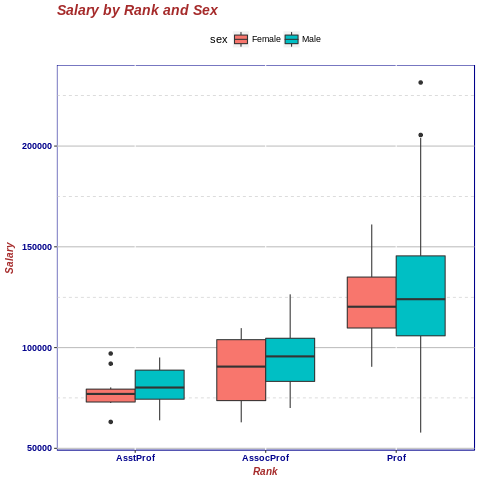

In [57]:
%%R
data(Salaries, package='carData')
library(ggplot2)
mytheme <- theme(plot.title=element_text(face='bold.italic', size='14', color='brown'),
axis.title=element_text(face='bold.italic',  size=10, color='brown'),
axis.text=element_text(face='bold', size=9,  color='darkblue'),
panel.background=element_rect(fill='white', color='darkblue'),
panel.grid.major.y=element_line(color='grey', linetype=1),
panel.grid.minor.y=element_line(color='grey', linetype=2),
panel.grid.minor.x=element_blank(), legend.position='top')

ggplot(Salaries, aes(x=rank, y=salary, fill=sex)) + geom_boxplot() +
labs(title='Salary by Rank and Sex', x='Rank', y='Salary') + mytheme

#### Python's plotnine:

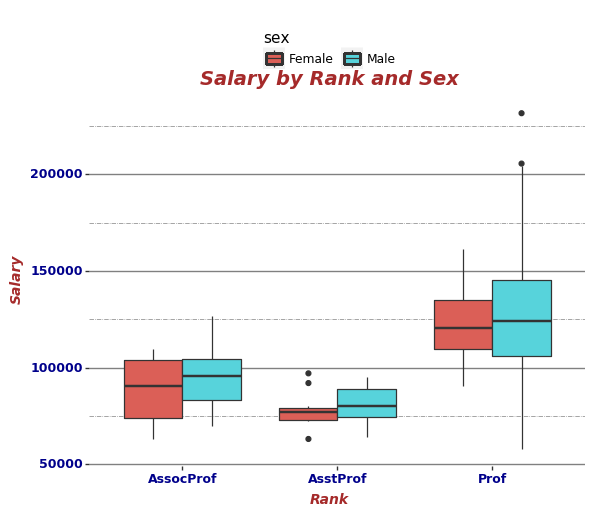

<ggplot: (8738519536918)>

In [58]:
mytheme = theme(plot_title=element_text(face='bold.italic', size=14, color='brown'),\
axis_title=element_text(face='bold.italic', size=10, color='brown'),\
axis_text=element_text(face='bold', size=9, color='darkblue'),\
panel_background=element_rect(fill='white', color='darkblue'),\
panel_grid_major_y=element_line(color='grey', linetype='solid'),\
panel_grid_minor_y=element_line(color='grey', linetype='dashdot'),\
panel_grid_minor_x=element_blank(), \
legend_position='top')

ggplot(Salaries, aes(x='rank', y='salary', fill='sex')) + \
geom_boxplot() + \
labs(title='Salary by Rank and Sex', x='Rank', y='Salary') + \
mytheme

__Conclusion:__ Very similar plots except for plot size and the ordering of academic ranks as in previous plots. However we can see that plot title and legend appear flipped in plotnine which shouldn't have been so.

### Plot 20: Scatterplot of years since graduation vs. salary with separate fitted quadratic regression lines for men and women

#### R's ggplot2:

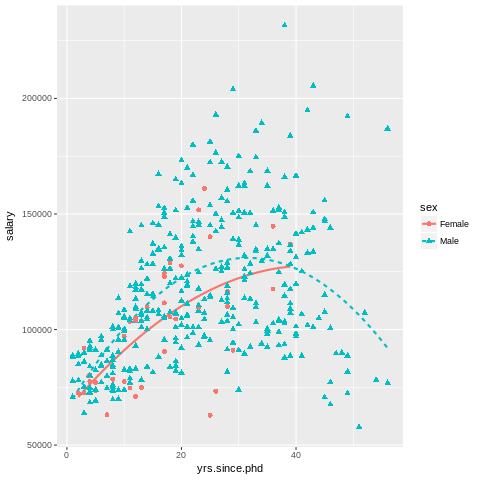

In [59]:
%%R
ggplot(data=Salaries, aes(x=yrs.since.phd, y=salary, linetype=sex, shape=sex, color=sex)) +
geom_smooth(method=lm, formula=y~poly(x,2), se=FALSE, size=1) +
geom_point(size=2)

#### Python's plotnine:

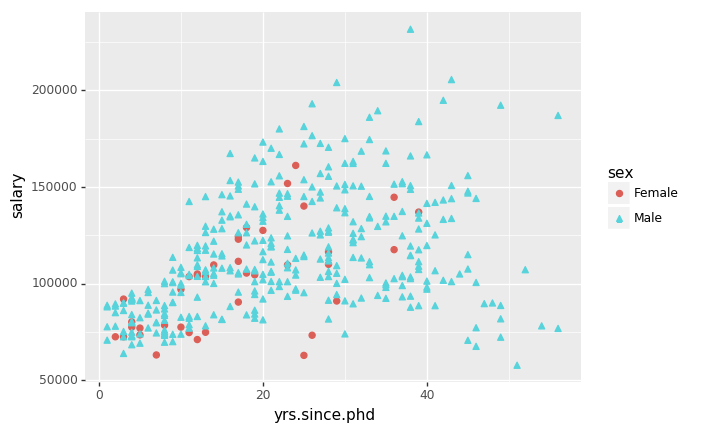

<ggplot: (8738519536995)>

In [60]:
ggplot(Salaries, aes(x='yrs.since.phd', y='salary', linetype='sex', shape='sex', color='sex')) + \
geom_point(size=2)

# Line 3: geom_smooth() - method and formula parameters have not yet been implemented

__Conclusion:__ Very similar plots except for plot and point size. The geom_smooth() function has not yet been implemented in plotnine, so we are unable to fit a polynomial curve as in ggplot2.

### Plot 21: Placing three ggplot2 plots in a single graph

#### R's ggplot2:

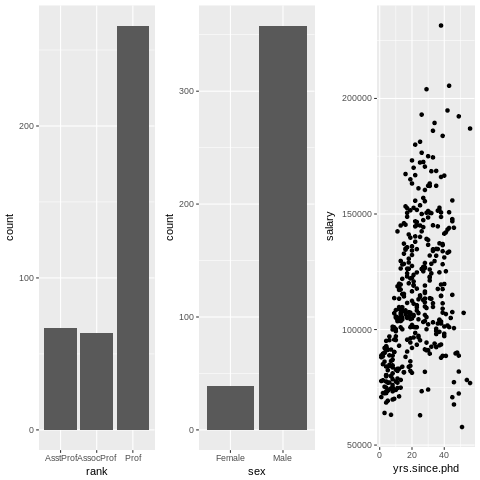

In [61]:
%%R
p1 <- ggplot(data=Salaries, aes(x=rank)) + geom_bar()
p2 <- ggplot(data=Salaries, aes(x=sex)) + geom_bar()
p3 <- ggplot(data=Salaries, aes(x=yrs.since.phd, y=salary)) + geom_point()
library(gridExtra)
grid.arrange(p1, p2, p3, ncol=3)

#### Python's plotnine:

Subplots have not yet been implemented in plotnine. As per Hassan Kibirige's comment dated 17 Aug 2017 on plotnine's github page:
"You cannot draw subplots. It will be implemented when Matplotlib gets a better layout manager. At the moment, it would be hard to implement."

This is a much desired feature and if / when implemented will make plotnine a true rival of R's ggplot2 in Python.

__Final Conclusion:__ plotnine appears to be a very appealing alternative to traditional matplotlib based plotting in python for those of us who are used to plotting in R and have been actively involved in R programming. This is because of the extremely easy-to-follow and intuitive grammar of graphics upon which ggplot2 is built and which can replace lines upon lines of matplotlib code with just a few lines while achieving the same result.

However plotnine has still some way to go especially in the area of subplotting which it lacks completely. Furthermore, statistical methods such as confidence intervals and polynomial fitting procedures also need to be implemented. But once these stumbling blocks are removed, plotnine will become a truly viable alternative in Python to R's ggplot2.